##install packages required

In [ ]:
import sys
!{sys.executable} -m pip install toytree gitpython wget mpld3 Bio

In [ ]:
##Load Packages
#normal data manipulation packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pylab
#Biopython packages
from Bio import Phylo, AlignIO, SeqIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import MuscleCommandline
from Bio.Align.Applications import ClustalwCommandline
#phylogenic tree
#import toytree
#import git



#sequence alignment and phylogenetic tree
## go to MUSCLE to input fasta sequence for alignment
## https://www.ebi.ac.uk/Tools/msa/muscle/

In [ ]:
#cline = ClustalwCommandline("clustalw2", infile="mAbs_LC_FASTA.fasta")
align = AlignIO.read("muscle-I20240202-023137-0249-37608114-p1m-aln-clustalw.txt", "clustal")
print(align)

Alignment with 5 rows and 402 columns
MKKLLKSVLAFAVL-GSASSLHALPVGNPAEPSLMIDGILWEGF...FRF MOMPM_CHLMU
MKKLLKSVLVFAAL-SSASSLQALPVGNPAEPSLMIDGILWEGF...FRF MOMPN_CHLTH
MKKLLKSVLVFAAL-SSASSLQALPVGNPAEPSLMIDGILWEGF...FRF MOMPE_CHLTH
MKKLLKSALLFATT-GSALSLQALPVGNPAEPSLLIDGTMWEGA...FRF A60109
MKKLLKSALLSAAFAGSVGSLQALPVGNPSDPSLLIDGTIWEGA...FRF MOMP_CHLPN


## create phylo tree

In [ ]:

# Open and initiate the Distance Calculator using the Identity model
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')

In [ ]:

# Write the Distance Matrix
distance_matrix = calculator.get_distance(align)
print(distance_matrix)

MOMPM_CHLMU 0.000000
MOMPN_CHLTH 0.184080    0.000000
MOMPE_CHLTH 0.169154    0.146766    0.000000
A60109  0.303483    0.343284    0.343284    0.000000
MOMP_CHLPN  0.328358    0.353234    0.350746    0.253731    0.000000
    MOMPM_CHLMU MOMPN_CHLTH MOMPE_CHLTH A60109  MOMP_CHLPN


### Using UPGMA Algorithm
https://medium.com/@poudelmohit59/beginners-guide-to-phylogenetic-tree-construction-using-biopython-5accbd8345a2

In [ ]:
# Create a DistanceTreeConstructor object
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distance_matrix)


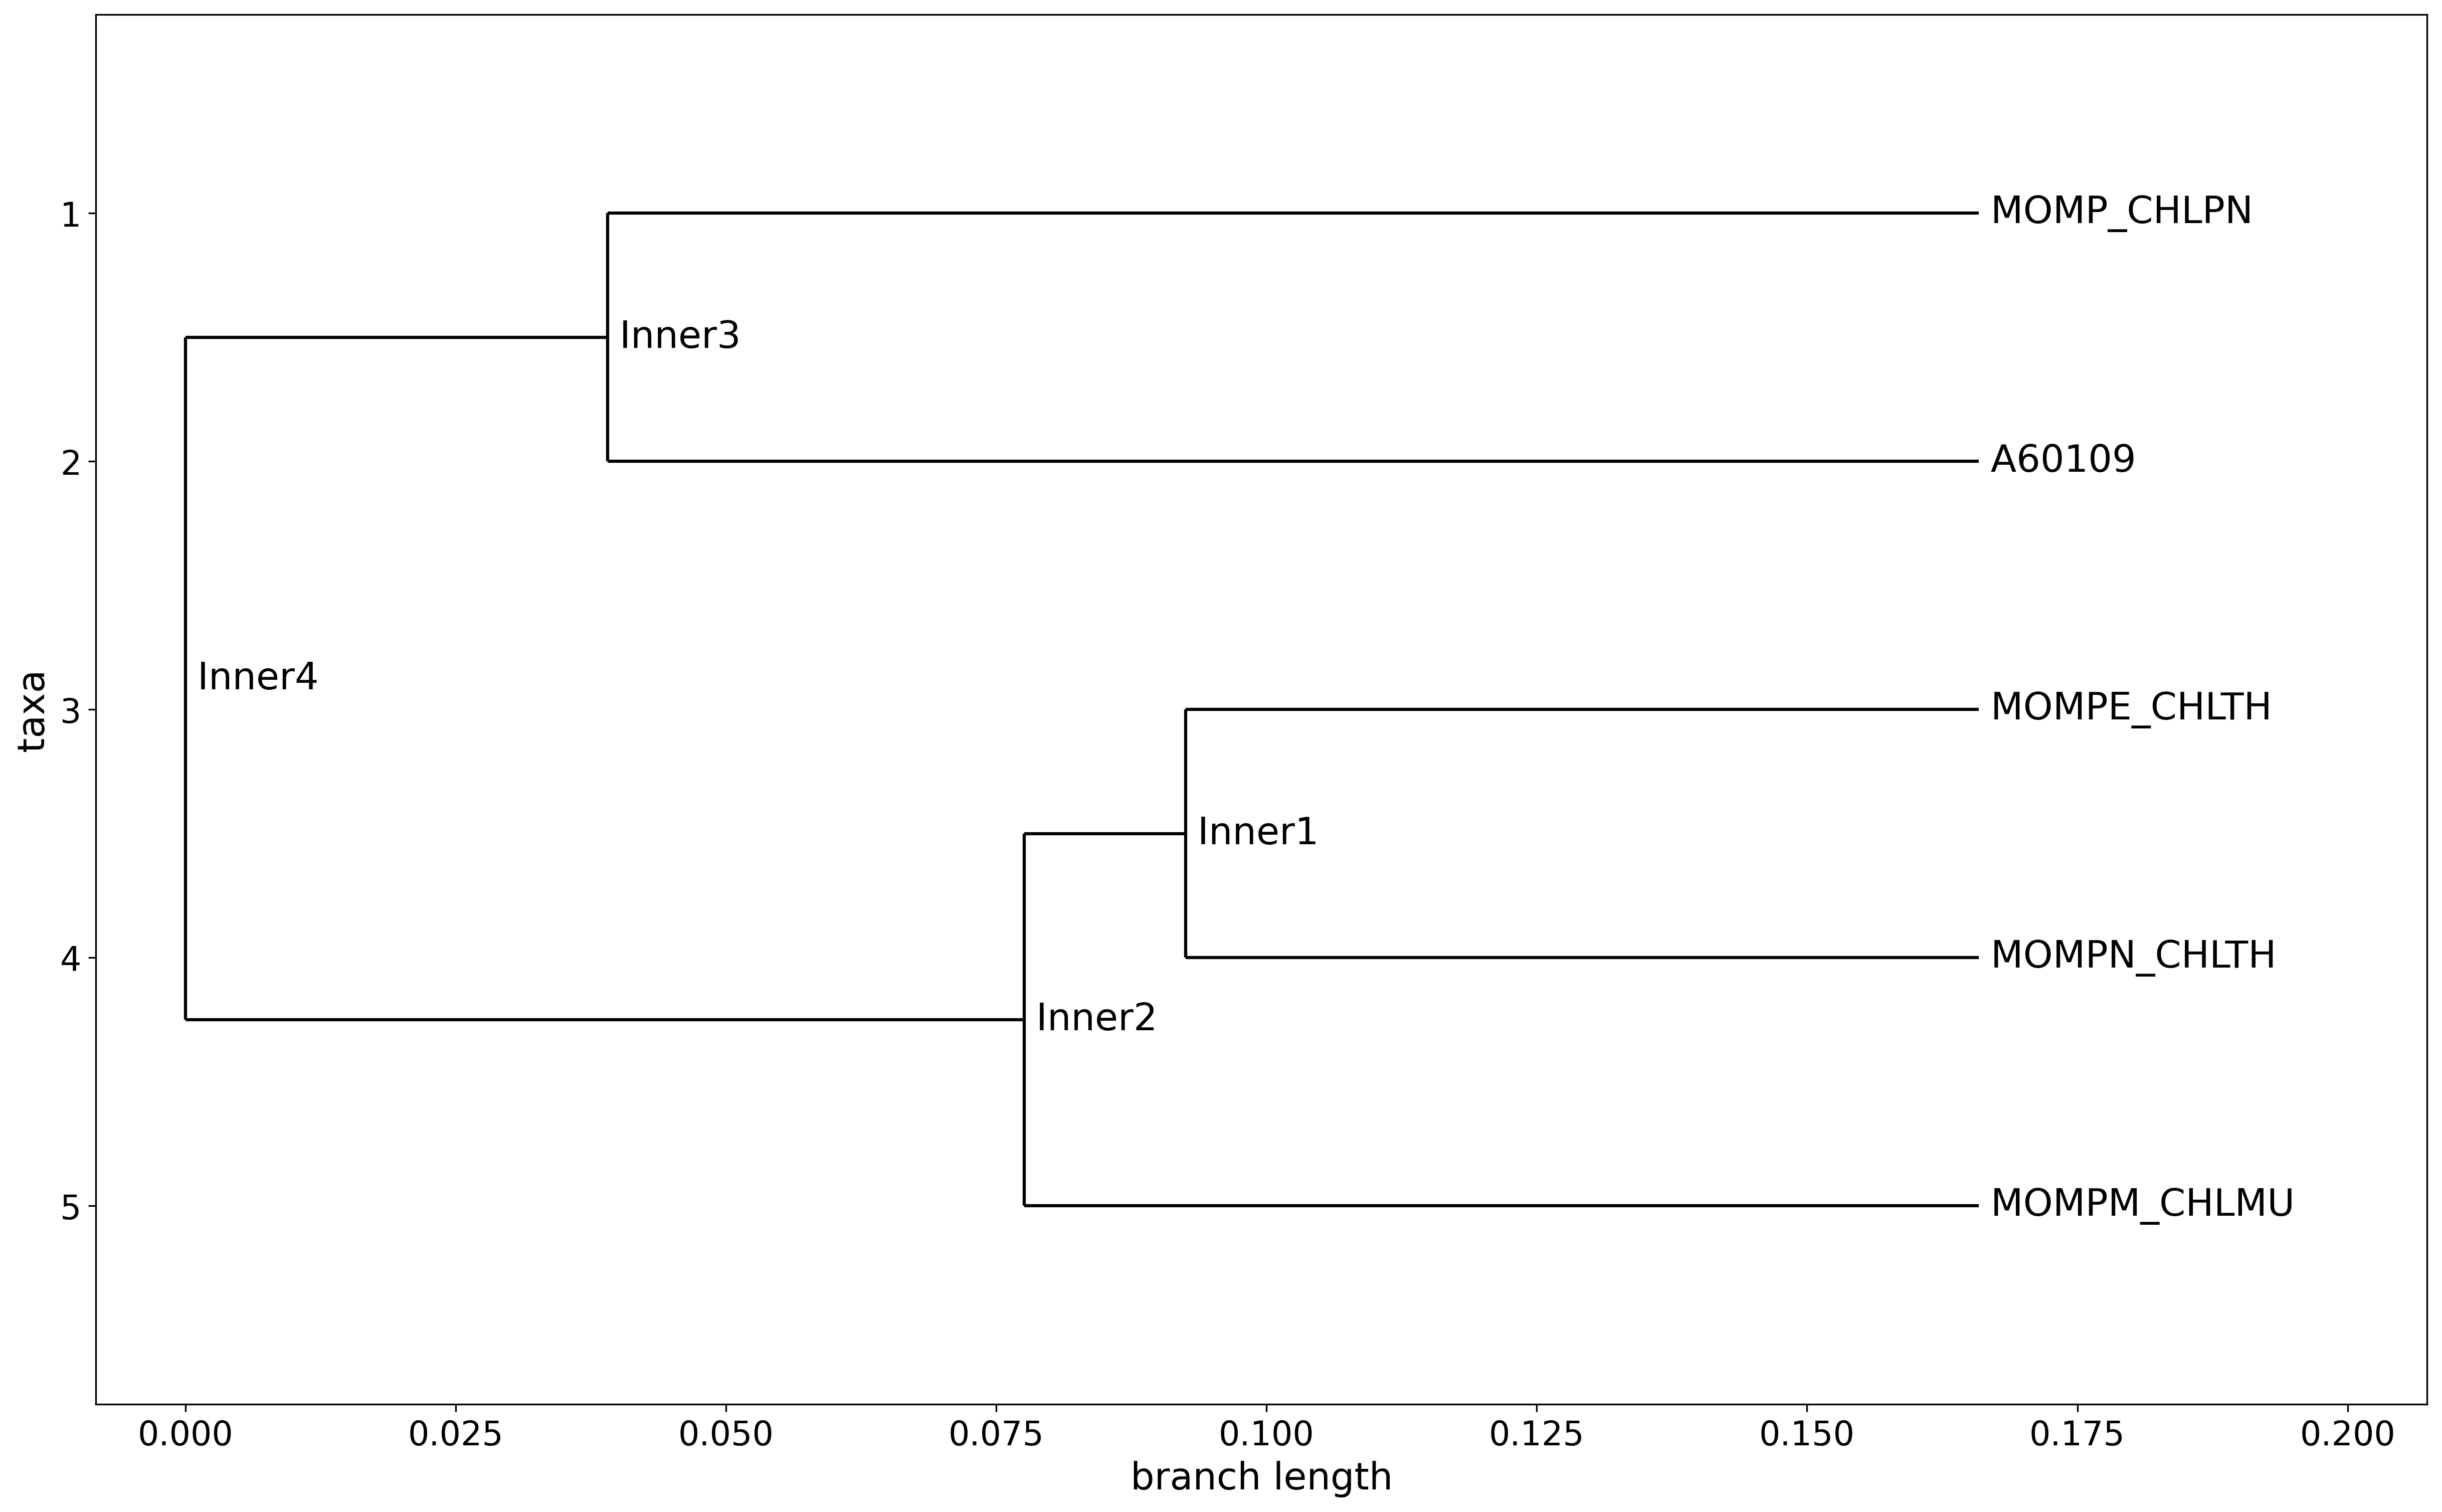

In [ ]:
# Make a better looking tree using the features of matplotlib

fig = plt.figure(figsize=(20, 12), dpi=300) # create figure & set the size
matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=16)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=16)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)

# drawing the tree
Phylo.draw(UPGMATree, axes=axes)
fig.savefig("UPGMATree")


###Import multipul fasta or clustal omega data into the workbook.

In [ ]:
##multipule data file
align1 = AlignIO.read("clustalo-I20200406-012943-0897-1425048-p2m.clustal_num", "clustal")
print(align1)
align2 = AlignIO.read("clustalo-I20200406-014019-0645-26828020-p2m.clustal_num", "clustal")
print(align2)
align3 = AlignIO.read("clustalo-I20200406-013054-0367-48373588-p2m.clustal_num", "clustal")
print(align3)
align4 = AlignIO.read("clustalo-I20200406-013931-0129-80505547-p2m.clustal_num", "clustal")
print(align4)
align5 = AlignIO.read("complete.clustal_num", "clustal")
print(align5)

file.fasta = fasta
\\
file.clustal_num = clustal

In [ ]:
##isolate ids form alignment
#for record in align5:
#    print("%s %i" % (record.id, len(record)))
for record in align:
    print("%s %i" % (record.id, len(record)))

#for record in RT_align:
#    print("%s %i" % (record.id, len(record)))

MOMPM_CHLMU 402
MOMPN_CHLTH 402
MOMPE_CHLTH 402
A60109 402
MOMP_CHLPN 402


In [ ]:
##maualy create ids dataframe from abouve list
ids = [ 'MOMPM_CHLMU',
'MOMPN_CHLTH',
'MOMPE_CHLTH',
'A60109',
'MOMP_CHLPN']

#### Turn Bio results into pandas df, print the two types to get an idea of how pandas arranges the data##

In [ ]:
#df1= pd.DataFrame(data = align1)
#print(df1)
df1= pd.DataFrame(data = align)
print(df1)
df1

  0   1   2   3   4   5   6   7   8   9    ... 392 393 394 395 396 397 398  \
0   M   K   K   L   L   K   S   V   L   A  ...   A   A   H   V   N   A   Q   
1   M   K   K   L   L   K   S   V   L   V  ...   A   A   H   V   N   A   Q   
2   M   K   K   L   L   K   S   V   L   V  ...   A   A   H   V   N   A   Q   
3   M   K   K   L   L   K   S   A   L   L  ...   A   A   H   V   N   A   Q   
4   M   K   K   L   L   K   S   A   L   L  ...   A   A   H   V   S   G   Q   

  399 400 401  
0   F   R   F  
1   F   R   F  
2   F   R   F  
3   F   R   F  
4   F   R   F  

[5 rows x 402 columns]


,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,M,K,K,L,L,K,S,V,L,A,...,A,A,H,V,N,A,Q,F,R,F
1,M,K,K,L,L,K,S,V,L,V,...,A,A,H,V,N,A,Q,F,R,F
2,M,K,K,L,L,K,S,V,L,V,...,A,A,H,V,N,A,Q,F,R,F
3,M,K,K,L,L,K,S,A,L,L,...,A,A,H,V,N,A,Q,F,R,F
4,M,K,K,L,L,K,S,A,L,L,...,A,A,H,V,S,G,Q,F,R,F


####insert manual Ids. This will depend on the ordering of the data in the origional clustal file

In [ ]:
ddf1 = pd.DataFrame(data = align)

#print(ddf1)

##append and save dataframe
dff1 = pd.DataFrame(ddf1)
ddf1
ddf1['Ids'] = ids

#ddf1['Ids'] = ids

#tt = ddf1.value_counts([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274])
#tt.to_csv('numbers.csv')
#ddf1.value_counts([0, 1, 2])


In [ ]:
#remove insertions from the seuence (-)
d = df1.loc[:,~(df1 == df1.iloc[0]).all()]
#e = df2.loc[:,~(df2 == df2.iloc[0]).all()]
#ff = df3.loc[:,~(df3 == df3.iloc[0]).all()]
#vv = df4.loc[:,~(df4 == df4.iloc[0]).all()]
#rr = df5.loc[:,~(df5 == df5.iloc[0]).all()]
dd = ddf1.loc[:,~(ddf1 == ddf1.iloc[0]).all()]
dd.head()
#dd.to_csv('xticksmutations.csv')

,7,9,10,12,13,14,15,17,18,21,...,374,379,380,381,383,385,389,396,397,Ids
0,V,A,F,V,L,-,G,A,S,H,...,V,Y,A,V,V,T,D,N,A,MOMPM_CHLMU
1,V,V,F,A,L,-,S,A,S,Q,...,V,Y,A,V,V,T,D,N,A,MOMPN_CHLTH
2,V,V,F,A,L,-,S,A,S,Q,...,V,Y,A,V,V,T,D,N,A,MOMPE_CHLTH
3,A,L,F,T,T,-,G,A,L,Q,...,I,W,S,I,G,A,N,N,A,A60109
4,A,L,S,A,F,A,G,V,G,Q,...,V,W,S,L,A,A,N,S,G,MOMP_CHLPN


#Statistical Coupling Analysis (SCA)
##https://reynoldsk.github.io/pySCA/
##https://github.com/ranganathanlab/pySCA
##https://github.com/reynoldsk/pySCA
##https://ranganathanlab.gitlab.io/pySCA/
##https://github.com/davidkastner/evoAllostery

# HeatMaps
    1) Global conserved residues
    2) Targeted conserved residues ( This is for knonw regions or dominant amino acids, Example - Glycine and Proline in Collagen)


##1) Global conserved residues

##Seqmented Heatmap

In [ ]:

#df1.groupby([0,1,2,3,4,5,6,7]).agg({2:['min','max','count']})#.to_csv('SpikeVariantsPhenotype.csv')
#print(df1.drop_duplicates(subset = 2))
#2,4,12,17,18,19,23,24,25,26,51,66,68,69,74,75,76,79,94,137,141,142,143,144,146,151,153,155,156,157,189,209,210,211,212,213,214,215,216,242,243,244,245,247,248,249,250,251,252,253,254,258,340,372,374,376,377,406,409,418,441,447,453,461,478,479,485,487,491,494,497,499,502,506,548,571,615,656,678,680,682,702,705,717,765,797,857,860,889,951,955,970,982,983,1028,1072,1102,1119,1177
#MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVR--DLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT
#'V','L','S','L','T','T','L','P','P','A','Q','A','H','V','G','T','K','D','T','D','G','V','Y','Y','K','W','E','E','F','R','R','I','N','L','V','-','-','R','D','L','L','A','L','R','S','Y','L','T','P','G','D','G','G','S','S','S','T','D','R','K','N','G','L','N','S','T','E','F','F','Q','G','Q','N','Y','T','A','D','H','Q','N','P','A','S','T','N','D','N','T','F','D','Q','N','L','S','T','Q','H','D','V

vals = {2 : ['V'], 4 : ['L'], 12 : ['S'], 17 : ['L'], 18 : ['T'], 19 : ['T'], 23 : ['L'], 24 : ['P'], 25 : ['P'], 26 : ['A'], 51 : ['Q'], 66 : ['A'],68 : ['H'], 69 : ['V'], 74 : ['G'], 75 : ['T'], 76 : ['K'], 79 : ['D'], 94 : ['T'], 137 : ['D'], 141 : ['G'], 142 : ['V'], 143 : ['Y'], 144 : ['Y'], 146 : ['K'], 151 : ['W'], 153 : ['E'], 155: ['E'], 156 : ['F'], 157 : ['R'], 189 : ['R'], 209 : ['I'],210 : ['N']
        ,211 : ['L'],212 : ['V'], 213 : ['-'], 214 : ['-'], 215 : ['R'], 216 : ['D'], 242 : ['L'], 243 : ['L'], 244 : ['A'], 245 : ['L'], 247 : ['R'], 248 : ['S'], 249 : ['Y'], 250 : ['L'], 251 : ['T'], 252 : ['P'], 253 : ['G'], 254 : ['D'], 258 : ['G'], 340 : ['G'], 372 : ['S'], 374 : ['S'], 376 : ['S'], 377 : ['T'], 406 : ['D'], 409 : ['R']
        ,418 : ['K'], 441 : ['N'], 447 : ['G'], 453 : ['L'], 461 : ['N'], 478 : ['S'], 479 : ['T'], 485 : ['E'], 487 : ['F'], 491 : ['F'], 494 : ['Q'], 497 : ['G'], 499 : ['Q'], 502 : ['N'], 506 : ['Y'], 548: ['T'], 571 : ['A'], 615 : ['D'], 656 : ['H'], 678 : ['Q'], 680 : ['N'], 682 : ['P'], 702: ['A'], 705 : ['S'], 717 : ['T'], 765 : ['N'], 797 : ['D'], 857 : ['N'], 860 : ['T'], 889 : ['F'], 951 : ['D'], 955 : ['Q'], 970 : ['N'], 982 : ['L'], 983 : ['S'], 1028 : ['T'], 1072 : ['Q'], 1102  : ['H'], 1119 : ['D'], 1177 : ['V']}

#ff = df1.isin(vals)
#ff['Ids'] = ids
#ff.to_csv('seq.csv')

#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd.iloc[:, :], axis=1)
ff.replace({False: 0, True: 1}, inplace=True)
#ft['Ids'] = ids
#ft.to_csv('spike_heatmap.csv')
ft.replace({False: 0, True: 1}, inplace=True)
tt = ft.eq(ff.iloc[:, :], axis=1)

#Turn boolean values into numeric values by multiplying by 1
#Use new data frame of 1 and 0 to populate heat map (seaborn)
pp.figure(figsize=(10,5))
#x_axis_labels = ['V','L','S','L','T','T','L','P','P','A','Q','A','H','V','G','T','K','D','T','D','G','V','Y','Y','K','W','E','E','F','R','R','I','N','L','V','-','-','R','D','L','L','A','L','R','S','Y','L','T','P','G','D','G','G','S','S','S','T','D','R','K','N','G','L','N','S','T','E','F','F','Q','G','Q','N','Y','T','A','D','H','Q','N','P','A','S','T','N','D','N','T','F','D','Q','N','L','S','T','Q','H','D','V'] # labels for x-axis
#x_axis_labels = ['V','L','S','L','T','T','L','P','P','A','Q','A','H','V','G','T','K','D','T','D','G','V','Y','Y','K','W','E','E','F','R','R','I','N','L','V','-','-','R','D','L','L','A','L','R','S','Y','L','T','P','G','D','G','G','S','S','S','T','D','R','K','N','G','L','N','S','T','E','F','F','Q','G','Q','N','Y','T','A','D','H','Q','N','P','A','S','T','N','D','N','T','F','D','Q','N','L','S','T','Q','H','D','V'] # labels for x-axis
y_axis_labels = ['Wuhan-Hu-1,nCoV','Alpha','Beta','Gamma','Delta','Epsilon','Eta','Iota','Kappa','Lambda','Omicron_BA1','Omicron_BA2','Omicrob_BA2.12.1', 'Omicron_BA4', 'Omicron_BA5' , 'Omicron_BA2.75'] # manual input for labels for y-axis
#sns.set(font_scale=8)

#sns.heatmap(ft, cmap='YlGnBu')
g = sns.heatmap(tt, yticklabels=y_axis_labels,cmap='YlGnBu')
#g.set(xticks=([2,4,12,17,18,19,23,24,25,26,51,66,68,69,74,75,76,79,94,137,141,142,143,144,146,151,153,155,156,157,189,209,210,211,212,213,214,215,216,242,243,244,245,247,248,249,250,251,252,253,254,258,340,372,374,376,377,406,409,418,441,447,453,461,478,479,485,487,491,494,497,499,502,506,548,571,615,656,678,680,682,702,705,717,765,797,857,860,889,951,955,970,982,983,1028,1072,1102,1119,1177]))
g.tick_params(labelsize=10)
#pp.savefig('Col_heatmap_conserved.png',bbox_inches='tight')
#pp.savefig('Spike_heatmap_conserved.pdf',bbox_inches='tight')

NameError: name 'ff' is not defined

In [ ]:
df1.describe()#.to_csv('spikedescibe.csv')

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
count,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
unique,1,1,1,1,1,1,1,2,1,3,...,1,1,1,1,2,2,1,1,1,1
top,M,K,K,L,L,K,S,V,L,V,...,A,A,H,V,N,A,Q,F,R,F
freq,5,5,5,5,5,5,5,3,5,2,...,5,5,5,5,4,4,5,5,5,5


##Parallel Heatmap

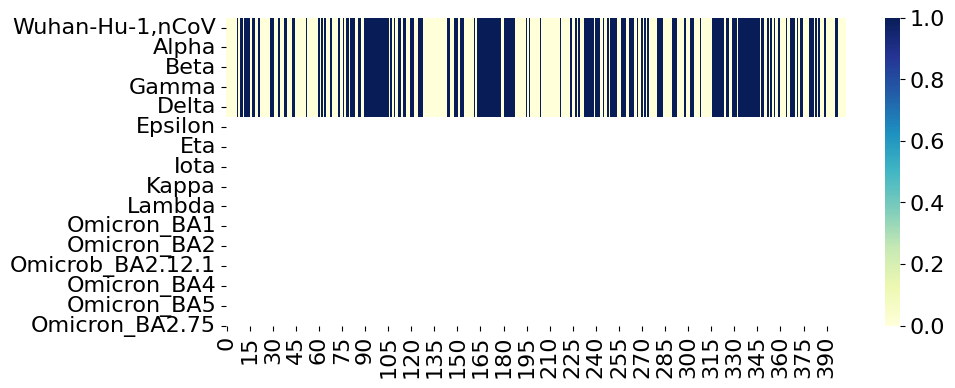

In [ ]:
#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd.iloc[:, :], axis=1)

#Turn boolean values into numeric values by multiplying by 1
#Use new data frame of 1 and 0 to populate heat map (seaborn)
pp.figure(figsize=(10,4))
x_axis_labels = ['V','L','S','L','T','T','L','P','P','A','Q','A','H','V','G','T','K','D','T','D','G','V','Y','Y','K','W','E','E','F','R','R','I','N','L','V','-','-','R','D','L','L','A','L','R','S','Y','L','T','P','G','D','G','G','S','S','S','T','D','R','K','N','G','L','N','S','T','E','F','F','Q','G','Q','N','Y','T','A','D','H','Q','N','P','A','S','T','N','D','N','T','F','D','Q','N','L','S','T','Q','H','D','V'] # labels for x-axis
#y_axis_labels = ['Wuhan-Hu-1,nCoV','Alpha','Beta','Gamma','Delta','Epsilon','Eta','Iota','Kappa','Lambda','Omicron_BA1','Omicron_BA2','Omicrob_BA2.12.1', 'Omicron_BA4', 'Omicron_BA5' , 'Omicron_BA2.75'] # manual input for labels for y-axis
#sns.set(font_scale=8)

#sns.heatmap(ft, cmap='YlGnBu')
g = sns.heatmap(ft, yticklabels=y_axis_labels,cmap='YlGnBu')
#g.set(xticks=([2,4,12,17,18,19,23,24,25,26,51,66,68,69,74,75,76,79,94,137,141,142,143,144,146,151,153,155,156,157,189,209,210,211,212,213,214,215,216,242,243,244,245,247,248,249,250,251,252,253,254,258,340,372,374,376,377,406,409,418,441,447,453,461,478,479,485,487,491,494,497,499,502,506,548,571,615,656,678,680,682,702,705,717,765,797,857,860,889,951,955,970,982,983,1028,1072,1102,1119,1177]))
#g.tick_params(labelsize=10)
#pp.savefig('Col_heatmap_conserved.png',bbox_inches='tight')
#pp.savefig('Spike_heatmap_conserved.pdf',bbox_inches='tight')

In [ ]:
df1.describe().to_csv('spikedescibe.csv')

##2) Targeted (conserved) residues

<Axes: >

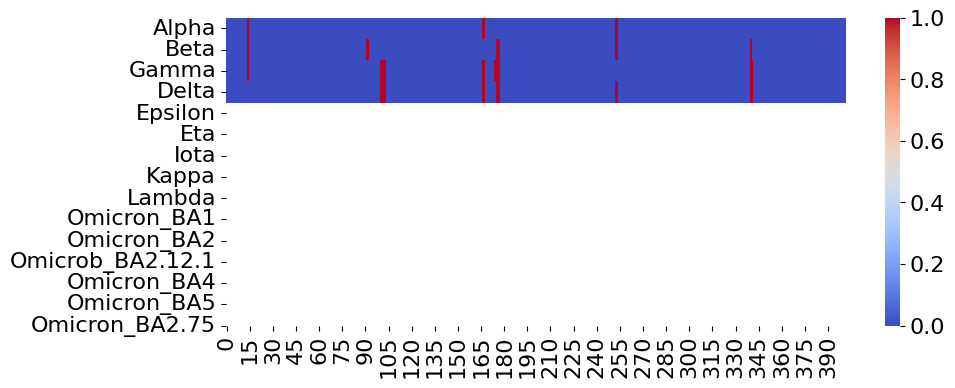

In [ ]:
#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
# uu = df1.loc[0:].eq('G')#,'P','A','L','I','N','K','R')
uu = df1.iloc[1:1247].eq('-')#,'P','A','L','I','N','K','R')
x_axis_labels = ['V','L','S','L','T','T','L','P','P','A','Q','A','H','V','G','T','K','D','T','D','G','V','Y','Y','K','W','E','E','F','R','R','I','N','L','V','-','-','R','D','L','L','A','L','R','S','Y','L','T','P','G','D','G','G','S','S','S','T','D','R','K','N','G','L','N','S','T','E','F','F','Q','G','Q','N','Y','T','A','D','H','Q','N','P','A','S','T','N','D','N','T','F','D','Q','N','L','S','T','Q','H','D','V'] # labels for x-axis
y_axis_labels = ['Alpha','Beta','Gamma','Delta','Epsilon','Eta','Iota','Kappa','Lambda','Omicron_BA1','Omicron_BA2','Omicrob_BA2.12.1', 'Omicron_BA4', 'Omicron_BA5' , 'Omicron_BA2.75'] # manual input for labels for y-axis

pp.figure(figsize=(10,4))
sns.heatmap(uu, cmap="coolwarm", yticklabels=y_axis_labels)

### Store important residue positions and associated Id

In [ ]:
#Save conserved amino acids
#way 1
f = ddf1.eq(dd.iloc[:, :], axis=1)
xfx = ft[ft.loc[:,] == 0]
ttx = xfx.dropna(axis=1, how='all')
ttx

#way 2
#remove True values
xf = f[f.loc[:,] == 0]
tt = xf.dropna(axis=1, how='all')
#check above heatmap manually and dataframe(tt) columns
#tt values should align with row/index number
        #g = df5.transpose()
        #g.to_csv('t.csv')

#save targetd group 1
xff = uu[uu.loc[:,] == 1]
ttt = xff.dropna(axis=1, how='all')
ttt['I.D.'] = ids

#save targetd group 2
xfff = ii[ii.loc[:,] == 1]
tttt = xfff.dropna(axis=1, how='all')
tttt['I.D.'] = ids

#save targetd group 3
xffff = zz[zz.loc[:,] == 1]
ttttt = xffff.dropna(axis=1, how='all')
ttttt['I.D.'] = ids


ValueError: Length of values (5) does not match length of index (4)

# Produce conserved (polyproline) template from conserved or targeted approch

In [ ]:
conservedRange2 = ddf1
conservedRange2

,0,1,2,3,4,5,6,7,8,9,...,393,394,395,396,397,398,399,400,401,Ids
0,M,K,K,L,L,K,S,V,L,A,...,A,H,V,N,A,Q,F,R,F,MOMPM_CHLMU
1,M,K,K,L,L,K,S,V,L,V,...,A,H,V,N,A,Q,F,R,F,MOMPN_CHLTH
2,M,K,K,L,L,K,S,V,L,V,...,A,H,V,N,A,Q,F,R,F,MOMPE_CHLTH
3,M,K,K,L,L,K,S,A,L,L,...,A,H,V,N,A,Q,F,R,F,A60109
4,M,K,K,L,L,K,S,A,L,L,...,A,H,V,S,G,Q,F,R,F,MOMP_CHLPN


## Add Filler into template to higfhlight conserved regions.

In [ ]:
#use range from above for editing, replace amino acids with dash
v = conservedRange2.replace(['A','V', 'Q', 'M','S','E','L','I','R','N','T','Y','W','F','K','D','H','C','G','P'], '-')
#use describe funstion to fine average sequence ncluding dash for final template sequence
#v.describe().to_csv('Template_polyproline_II_collagen.csv')
v.describe().to_csv('spikeConservedTemplate.csv')
v

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
9,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
#a = pd.read_csv('Template_polyproline_II_collagen.csv')
a = pd.read_csv('spikeConservedTemplate.csv')
a.loc[2:2]#.transpose()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
2,top,U,U,u,U,U,u,U,U,P,...,u,U,O,G,u,O,U,H,U,T


## Use wildcard search parameters as alternative to above


##AcidSma = 'D', 'S'
##AcidLarge = 'E'

##BasicSma = 'H'
##BasicLarge = 'R','K'

##HPolSma = 'T'
##HPolLarge = 'N', 'Q'

##HnonSma = 'G', 'P', 'A', 'V'
##HnonLarge = 'C', 'I', 'L', 'M', 'F', 'Y', 'W'

#AcidicSma = 'j'
#AcidicLarge = 'J'
#BasicSma = 'o'
#BasicLarge = 'O'
#HPolSma = 'x'
#HPolLarge = 'X'
#HnonSma = 'u'
#HnonLarge = 'U'

In [ ]:
cc = conservedRange2.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidSma).replace(['E'], AcidLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge)
#print(cc)
df = pd.DataFrame(cc)
df['Ids'] = ids
print(df)
df.sort_values(by='Ids')
df.to_csv('BulkySpike.csv')
#cc.describe().to_csv('Template_polyproline_II_collagen_2.csv')
#aa = pd.read_csv('Template_polyproline_II_collagen_2.csv')
cc.describe().to_csv('spikeConserved_dictionary_noMO2.csv')
cc.to_csv('spikebulk.csv')
aa = pd.read_csv('spikeConserved_dictionary_noMO2.csv')
aa.loc[2:2]#.transpose()
aa

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Ids
5,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Alpha 1275
4,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,BETA 1275
2,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Delta 1275
10,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Epsilon 1275
7,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Eta 1275
1,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,GAMMA 1275
8,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Iota 1275
6,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Kappa 1275
3,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Lambda 1275
14,U,U,u,U,U,u,U,U,u,U,...,U,O,u,u,O,U,o,U,x,Omicrob_BA2.12.1 1275


## After loading in packages, create aminop acid libraries in the order stated below
##Library 1 - Inhouse wild card values [Jj,Oo,Xx,Uu] Note B and Z can be used but for now (ver 1.2) only
##4 out of 6 wilde card are chooses. Please see document (Inhouse_wildcard_basic.txt for explination of library

In [ ]:
##Amino acids are classified into groups od physical bulkiness

AcidSma = 'D', 'S'
AcidLarge = 'E'

BasicSma = 'H'
BasicLarge = 'R','K'

HPolSma = 'T'
HPolLarge = 'N', 'Q'

HnonSma = 'G', 'P', 'A', 'V'
HnonLarge = 'C', 'I', 'L', 'M', 'F', 'Y', 'W'

In [ ]:
##amino acid groups are assigned uniq identifier
AcidicSma = 'j'
AcidicLarge = 'J'
BasicSma = 'o'
BasicLarge = 'O'
HPolSma = 'x'
HPolLarge = 'X'
HnonSma = 'u'
HnonLarge = 'U'

In [ ]:
data = {'A': [45, 37, 42],
        'B': [38, 31, 26],
        'C': [10, 15, 17]
        }
# creation of DataFrame
df = pd.DataFrame(data)
df

,A,B,C
0,45,38,10
1,37,31,15
2,42,26,17


In [ ]:
# creation of correlation matrix
#http://what-when-how.com/molecular-biology/van-der-waals-surface-volume-molecular-biology/

data = {'A':  [67],
'R':  [148],
'N':  [96],
'D':  [91],
'C':  [86],
'E':  [114],
'Q':  [109],
'G':  [48],
'H':  [118],
'I':  [124],
'L':  [124],
'K':  [135],
'M':  [124],
'F':  [135],
'P':  [90],
'S':  [90],
'T':  [93],
'W':  [163],
'Y':  [141],
'V':  [105],
        }

data
# creation of DataFrame
df = pd.DataFrame(data)
#matrix = read_csv('VdWRadiusMatrix.csv')
corrM = df.corr()

corrM

,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V
0,67,148,96,91,86,114,109,48,118,124,124,135,124,135,90,90,93,163,141,105


# Retroviral FVp analysis

In [ ]:
# Load in MUSCLE alignment data
RT_align = AlignIO.read("RT_clustal.txt", "clustal")
print(RT_align)
INT_align = AlignIO.read("INT_clust.txt", "clustal")
print(INT_align)
PRO_align = AlignIO.read("pro_clust.txt", "clustal")
print(PRO_align)

Alignment with 7 rows and 252 columns
EKEGKISEAPPENPYNTPVFAIKKK---DSGKWRMLIDFRELNK...GIK RT_lentiviridae
LEAGYI--EPYDGPGNNPVFPVKKP---N-GTWRFIHDLRATNA...TLR RT_deltaretroviridae
LKLGRI--IPSLSQWNSPVFVIRKK---DKSKYRLLHDLRAVNA...LRP RT_alpharetroviridae
LEAGHI--EPSNSPWNTPVFVIKKK---S-GKWRLLQDLRAVNA...LPT RT_betaretroviridae
LKQGVL-KEQQNSPMNTPVYPVPKP---D-GRWRMVLDYRAVNK...NYA RT_spumaretroviridae
LDQGIL--VPCQSPWNTPLLPVKKP---GTNDYRPVQDLREVNK...GFA RT_gammaretroviridae
LEAGVL--VRTSSPCNTPILPVLKKKADGKDKYRMVHDLRAIND...DYS RT_epsilonretroviridae
Alignment with 7 rows and 364 columns
HNELGSAHLGREAALLKILEKYWWPN---LKKDISKILVNCTNC...--- INT_spumaretroviridae
H---GLTHVSKGEMLKRISK-LWWHP--YMKEMIDLFLAKCQIC...--- INT_epsilonretroviridae
H---KLTHLGQEKLKELLVREEYLIP--RLRTLARQVTKSCKAC...PPQ INT_gammaretroviridae
H---EKWHSDPKILRR-------EFG--LPRLVAKEIVQQCPKC...PDP INT_lentiviridae
H---KLTHCNSRALVR-------WLNGATPAEDAKSLLQTCHTC...ACP INT_deltaretroviridae
H---AALHLGAKALAK-------ECN--ISLTEVRRLVKSCSHC...VTQ INT_alphare

In [ ]:
#Printout ID of aligned data
for record in RT_align:
    print("%s %i" % (record.id, len(record)))
for record in PRO_align:
    print("%s %i" % (record.id, len(record)))
for record in INT_align:
    print("%s %i" % (record.id, len(record)))

In [ ]:
#manually add ids in ID variable
##maualy create ids dataframe from abouve list
RTids = ['RT_lentiviridae'
, 'RT_deltaretroviridae'
, 'RT_alpharetroviridae'
, 'RT_betaretroviridae'
, 'RT_spumaretroviridae'
, 'RT_gammaretroviridae'
, 'RT_epsilonretroviridae']
PROids = ['AP_spumaretroviridae'
, 'AP_lentiviridae'
, 'AP_betaretroviridae'
, 'AP_alpharetroviridae'
, 'AP_deltaretroviridae'
, 'AP_epsilonretroviridae']
INTids = ['INT_spumaretroviridae'
, 'INT_epsilonretroviridae'
, 'INT_gammaretroviridae'
, 'INT_lentiviridae'
, 'INT_deltaretroviridae'
, 'INT_alpharetroviridae'
, 'INT_betaretroviridae']

In [ ]:
#turn alignments into dataframe
df1= pd.DataFrame(data = RT_align)
print(df1)
df1
df2= pd.DataFrame(data = INT_align)
print(df2)
df2
# df2.to_csv('int_alignDF.csv')
df3= pd.DataFrame(data = PRO_align)
print(df3)
df3

In [ ]:
#statistis of amino acids in positions
df1.describe().to_csv('RT_stat.csv')
df2.describe().to_csv('INT_stat.csv')
df3.describe().to_csv('PRO_stat.csv')

#remove insertions from the seuence (-)
dd3 = df3.loc[:,~(df3 == df3.iloc[0]).all()]
# dd3.head()
dd1 = df1.loc[:,~(df1 == df1.iloc[0]).all()]
dd2 = df2.loc[:,~(df2 == df2.iloc[0]).all()]

In [ ]:
#statistis of amino acids in positions
df1.describe()

#remove insertions from the seuence (-)
dd1 = df1.loc[:,~(df1 == df1.iloc[0]).all()]

In [ ]:
#calculate statistics of amino acids in each position
stat1 = []
stat2 = []
for i in range(101): # THIS NEED TO MATCH THE NUMEBR OF AMINO ACIDS IN PROTEIN
  # ss = df3[i].value_counts()
  # ss = df3[i].value_counts(normalize=True) # prints list of amino acid frequencies
  ss = df1[i].value_counts(normalize=True).tolist() # as the line above but transposed values
  if i not in ss:
    # stat1.append(ss)
    stat2.append(ss)

# print(stat1)

# pdstat1 = pd.DataFrame(stat1)
pdstat2 = pd.DataFrame(stat2)
# pdstat1.to_csv('PRO_aminoacidSTAT.csv')
# pdstat2.to_csv('PRO_aminoacidSTAT_norm.csv')
pdstat2

,0,1,2,3
0,1.0,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN
...,...,...,...,...
95,0.4,0.2,0.2,0.2
96,0.4,0.2,0.2,0.2
97,0.8,0.2,NaN,NaN
98,0.6,0.2,0.2,NaN


ChatGPT generated tidy code

Explanation of changes and additions:

Added an import statement for the pandas library, assuming you're using it.
Removed the unnecessary stat1 list since it's not being used.
Added comments explaining the purpose of each part of the code.
Improved the variable name amino_acid_frequencies for clarity.
Removed the commented-out code for saving CSV files to keep the example concise.
Please note that you need to ensure df3 is properly defined and contains the protein data in the format you expect. Also, make sure the iteration range (range(101)) accurately reflects the number of amino acid positions in your protein data.

In [ ]:
import pandas as pd

# Assuming df3 is your DataFrame containing protein data

# Initialize lists to store statistics for each position
stat2 = []

# Iterate through each position (amino acid) in the protein (101 positions)
for i in range(99):  # Make sure this matches the actual number of amino acids in the protein
    # Calculate the frequency of each amino acid at the current position (normalized)
    amino_acid_frequencies = df1[i].value_counts(normalize=True).tolist()

    # Append the frequencies to the stat2 list
    stat2.append(amino_acid_frequencies)

# Convert the stat2 list of lists into a DataFrame
pdstat2 = pd.DataFrame(stat2)

# Optionally, you can save the DataFrame to CSV files if needed
# pdstat2.to_csv('PRO_aminoacidSTAT_norm.csv')


In [ ]:
#Searching for values equal to 1, i.e, conserved amino acids in all 7 families
tt = pdstat2[pdstat2.eq(1.0000).any(axis=1)] #seaches based on the frequency list

#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd1.iloc[:, :], axis=1)
ft.replace({False: 1, True: 0}, inplace=True)
ff = ft.T[ft.T.eq(1.0000).any(axis=1)]
new = ff.replace([0], 1.0000)
new.index # gets index of conserved amino acids
# arr2

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  11,  16,
            ...
            390, 391, 392, 393, 394, 395, 398, 399, 400, 401],
           dtype='int64', length=221)

In [ ]:
# df1.T.iloc[0, 0:1] = [0.142857] # changes values in transposed data, df1.T.iloc[row to change, colstart:colend] = [value to change]
#df1.T.loc[df1.index[7], :] # should show values for entire row and specific

#chqnges values of amino acids in the conserved indexes
indices = [3,  15,  17,  23,  33,  37,  39,  42,  74,  94,  95, 114, 115,
            116, 117, 121, 122, 150, 152, 153, 177, 181, 188, 200, 238]
dff1 = df1
dff1.T.loc[indices, 0: 7] = 1.0000

print(dff1.head(16))

  0   1   2    3   4   5   6   7   8   9    ... 392 393 394 395 396 397 398  \
0   M   K   K  1.0   L   K   S   V   L   A  ...   A   A   H   V   N   A   Q   
1   M   K   K  1.0   L   K   S   V   L   V  ...   A   A   H   V   N   A   Q   
2   M   K   K  1.0   L   K   S   V   L   V  ...   A   A   H   V   N   A   Q   
3   M   K   K  1.0   L   K   S   A   L   L  ...   A   A   H   V   N   A   Q   
4   M   K   K  1.0   L   K   S   A   L   L  ...   A   A   H   V   S   G   Q   

  399 400 401  
0   F   R   F  
1   F   R   F  
2   F   R   F  
3   F   R   F  
4   F   R   F  

[5 rows x 402 columns]


In [ ]:
#Searching for values equal to 1, i.e, conserved amino acids in all 7 families
tt  = pdstat2[pdstat2[0:] < 0.285714] #seaches based on the frequency list
tt

#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd1.iloc[:, :], axis=1)
ft.replace({False: 1, True: 0}, inplace=True)
ff = ft.T[ft.T.eq(1.0000).any(axis=1)]
new = ff.replace([0], 1.0000)
new.index # gets index of conserved amino acids


Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  11,  15,
            ...
            390, 391, 392, 393, 394, 395, 398, 399, 400, 401],
           dtype='int64', length=235)

In [ ]:
ddf = df1.iloc[0:7, 10:15]
ddf

ddf2 = df1.iloc[0:7, 16:25]
ddf2
# ddf3 = df1.iloc[0:7, 10:15] + df1.iloc[0:7, 16:25]
ddf3 = pd.concat([ddf, ddf2], axis=1)
ddf3
# arr2.loc[df1.index[6], :]

,10,11,12,13,14,16,17,18,19,20,21,22,23,24
0,P,E,N,P,Y,T,P,V,F,A,I,K,K,K
1,Y,D,G,P,G,N,P,V,F,P,V,K,K,P
2,S,L,S,Q,W,S,P,V,F,V,I,R,K,K
3,S,N,S,P,W,T,P,V,F,V,I,K,K,K
4,Q,N,S,P,M,T,P,V,Y,P,V,P,K,P
5,C,Q,S,P,W,T,P,L,L,P,V,K,K,P
6,T,S,S,P,C,T,P,I,L,P,V,L,K,K


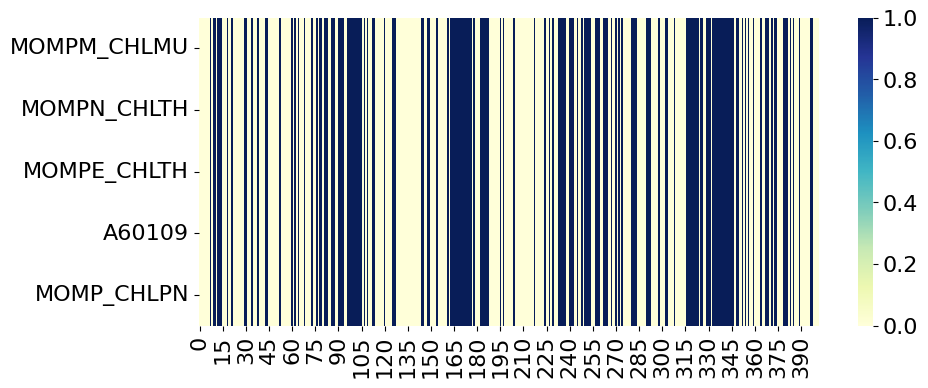

In [ ]:
#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd1.iloc[:, :], axis=1)
# ft = df2.eq(dd2.iloc[:, :], axis=1)
# ft = df3.eq(dd3.iloc[:, :], axis=1)
#Turn boolean values into numeric values by multiplying by 1
#Use new data frame of 1 and 0 to populate heat map (seaborn)
pp.figure(figsize=(10,4))
x_axis_labels = ['L', 'K', 'A', 'G', 'V', 'I', '-', '-', 'E', 'P', 'S', 'N', 'S', 'P', 'W', 'N', 'T', 'P', 'V', 'F', 'P', 'V', 'K', 'K', 'K', '-', '-', '-', 'D', '-', 'G', 'K', 'W', 'R', 'M', 'L', 'H', 'D', 'L', 'R', 'A', 'V', 'N', 'K', 'L', 'T', 'K', 'D', 'L', 'G', 'A', 'L', 'Q', 'P', 'G', 'L', 'P', 'H', '-', '-', 'L', 'S', 'G', 'L', 'P', 'K', 'K', '-', 'K', 'H', 'I', 'T', 'V', 'L', 'D', 'L', 'K', 'D', 'A', 'F', 'F', 'T', 'I', 'P', 'L', 'A', 'E', 'E', 'S', 'Q', 'P', 'Y', 'F', '-', 'A', 'F', 'T', 'L', 'P', 'S', 'V', 'N', 'N', '-', 'G', 'P', 'G', 'K', 'R', 'Y', 'Q', 'W', 'T', 'V', 'L', 'P', 'Q', 'G', 'F', 'K', 'N', 'S', 'P', 'T', 'L', 'F', 'Q', 'S', 'A', 'L', 'A', 'E', 'V', 'L', 'R', 'P', 'I', '-', '-', 'R', 'K', 'K', 'H', 'P', 'D', 'L', 'T', 'L', 'L', 'Q', 'Y', 'M', 'D', 'D', 'L', 'L', 'L', 'A', 'A', 'P', '-', 'T', 'K', 'E', 'E', 'H', 'L', 'E', 'L', 'S', '-', 'E', 'A', 'L', 'L', 'A', 'L', 'L', 'L', 'E', 'A', 'G', 'L', 'K', 'V', 'S', 'D', 'E', 'K', 'L', 'Q', 'L', 'E', 'P', '-', 'P', 'V', 'K', 'F', 'L', 'G', 'Y', 'E', 'I', 'S', 'P', 'E', 'K', 'R', 'A', 'L', '-', '-', '-', '-', '-', 'E', 'K', 'L', 'V', '-', 'I', '-', 'P', 'E', 'K', 'K', '-', '-', 'T', 'L', 'N', 'D', 'L', 'Q', 'K', 'L', 'L', 'G', 'L', 'L', 'N', 'W', 'A', 'R', 'P', 'W', 'I', 'P', 'G', 'Y', 'A'] # labels for x-axis
y_axis_labels = ids # manual input for labels for y-axis
#sns.set(font_scale=8)

#sns.heatmap(ft, cmap='YlGnBu')
g = sns.heatmap(ft, yticklabels=y_axis_labels, cmap='YlGnBu')
# pp.xticks(rotation=45)
#g.set(xticks=([2,4,12,17,18,19,23,24,25,26,51,66,68,69,74,75,76,79,94,137,141,142,143,144,146,151,153,155,156,157,189,209,210,211,212,213,214,215,216,242,243,244,245,247,248,249,250,251,252,253,254,258,340,372,374,376,377,406,409,418,441,447,453,461,478,479,485,487,491,494,497,499,502,506,548,571,615,656,678,680,682,702,705,717,765,797,857,860,889,951,955,970,982,983,1028,1072,1102,1119,1177]))
#g.tick_params(labelsize=10)
#pp.savefig('Col_heatmap_conserved.png',bbox_inches='tight')
#pp.savefig('Spike_heatmap_conserved.pdf',bbox_inches='tight')
pp.savefig('MOMP_heatmap_conserved.pdf',bbox_inches='tight')

#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#searching for matching amino acid within each column
# uu = df1.loc[0:].eq('G')#,'P','A','L','I','N','K','R')
# f = sns.heatmap(uu, yticklabels=y_axis_labels, cmap='YlGnBu')

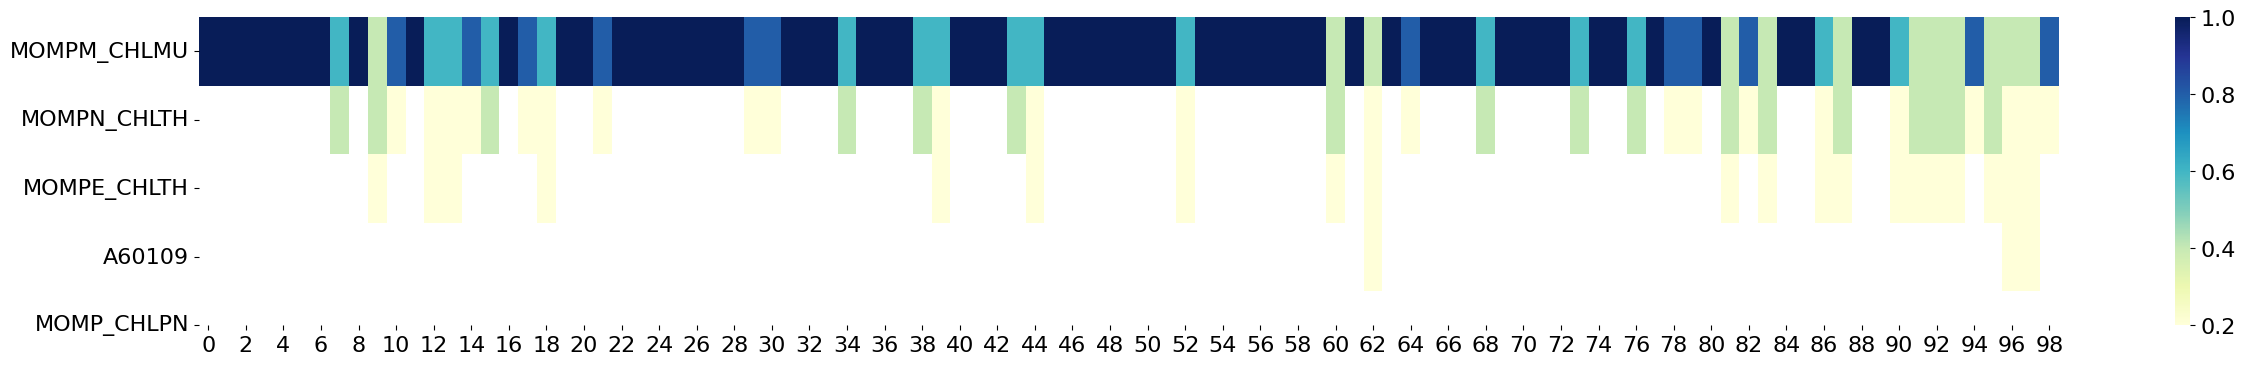

In [ ]:
ar2 = pdstat2.transpose()
pp.figure(figsize=(30,4))
#sns.heatmap(ft, cmap='YlGnBu')
g = sns.heatmap(ar2, yticklabels=y_axis_labels, cmap='YlGnBu')
pp.savefig('MOMP_conserved.pdf',bbox_inches='tight')

# SeqLogo

##https://www.tije.co/post/seqlogo_from_multiple_sequence_alignment/

In [ ]:
!pip install seqlogo
!apt-get install ghostscript pdf2svg

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.7/571.7 kB 15.3 MB/s eta 0:00:00
  Created wheel for seqlogo: filename=seqlogo-5.29.8-py2.py3-none-any.whl size=19402 sha256=842b79cfd779f074c64befc61d3529612ec25dabafccd092f791cb2306ca693d
  Stored in directory: /root/.cache/pip/wheels/eb/39/a1/047aeb709aab3039d0e8f245176d7c553f818779803466d146
Successfully built seqlogo
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libpoppler-glib8 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be

In [ ]:

import seqlogo

In [ ]:
# Load in MUSCLE alignment data
RT_align = AlignIO.read("RT_clustal.txt", "clustal")
INT_align = AlignIO.read("INT_clust.txt", "clustal")
PRO_align = AlignIO.read("pro_clust.txt", "clustal")

In [ ]:
def alnSiteCompositionDF(aln, characters="ACDEFGHIKLMNPQRSTVWY"):
  alnRows = aln.get_alignment_length()
  compDict = {char:[0]*alnRows for char in characters}
  for record in aln:
    header = record.id
    seq = record.seq
    for aaPos in range(len(seq)):
      aa = seq[aaPos]
      if aa in characters:
        compDict[aa][aaPos] += 1
  return pd.DataFrame.from_dict(compDict)

In [ ]:
RT_alignmentSiteCompDF = alnSiteCompositionDF(RT_align)
INT_alignmentSiteCompDF = alnSiteCompositionDF(INT_align)
PRO_alignmentSiteCompDF = alnSiteCompositionDF(PRO_align)


In [ ]:
RT_alignmentSiteFreqDF = RT_alignmentSiteCompDF.div(RT_alignmentSiteCompDF.sum(axis=1), axis=0)
INT_alignmentSiteFreqDF = INT_alignmentSiteCompDF.div(INT_alignmentSiteCompDF.sum(axis=1), axis=0)
PRO_alignmentSiteFreqDF = PRO_alignmentSiteCompDF.div(PRO_alignmentSiteCompDF.sum(axis=1), axis=0)

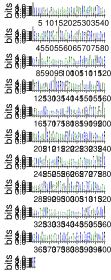

In [ ]:
momp = alnSiteCompositionDF(align)
momp_alignmentSiteFreqDF = momp.div(momp.sum(axis=1), axis=0)
momp_alignmentSiteFreqSeqLogo = seqlogo.Ppm(momp_alignmentSiteFreqDF,alphabet_type="AA")
seqlogo.seqlogo(momp_alignmentSiteFreqSeqLogo, ic_scale = True, format = 'svg', size = 'xlarge',filename = 'MompSeqlogo.svg')

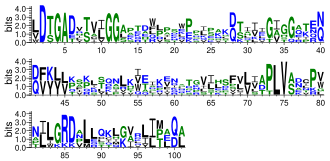

In [ ]:
RT_alignmentSiteFreqSeqLogo= seqlogo.Ppm(RT_alignmentSiteFreqDF,alphabet_type="AA")
seqlogo.seqlogo(RT_alignmentSiteFreqSeqLogo, ic_scale = True, format = 'svg', size = 'xlarge',filename = 'RTSeqlogo.svg')
INT_alignmentSiteFreqSeqLogo= seqlogo.Ppm(INT_alignmentSiteFreqDF,alphabet_type="AA")
seqlogo.seqlogo(INT_alignmentSiteFreqSeqLogo, ic_scale = True, format = 'svg', size = 'xlarge',filename = 'INTSeqlogo.svg')
PRO_alignmentSiteFreqSeqLogo= seqlogo.Ppm(PRO_alignmentSiteFreqDF,alphabet_type="AA")
seqlogo.seqlogo(PRO_alignmentSiteFreqSeqLogo, ic_scale = True, format = 'svg', size = 'xlarge',filename = 'PROSeqlogo.svg')

# t7 = t7_alignmentSiteFreqDF.transpose()
# sns.heatmap(t7, cmap='YlGnBu')


In [ ]:
#remove insertions from the seuence (-)
d1 = df1.loc[:,~(df1 == df1.iloc[0]).all()]
d2 = df2.loc[:,~(df2 == df2.iloc[0]).all()]
d3 = df3.loc[:,~(df3 == df3.iloc[0]).all()]
d1
d2
d3

NameError: ignored

In [ ]:
#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd.iloc[:, :], axis=1)
ff.replace({False: 0, True: 1}, inplace=True)
ft.replace({False: 0, True: 1}, inplace=True)
tt = ft.eq(ff.iloc[:, :], axis=1)

ft = df1.eq(dd.iloc[:, :], axis=1)
ff.replace({False: 0, True: 1}, inplace=True)
ft.replace({False: 0, True: 1}, inplace=True)
tt = ft.eq(ff.iloc[:, :], axis=1)

ft = df1.eq(dd.iloc[:, :], axis=1)
ff.replace({False: 0, True: 1}, inplace=True)
ft.replace({False: 0, True: 1}, inplace=True)
tt = ft.eq(ff.iloc[:, :], axis=1)


In [ ]:
#Save conserved amino acids
#way 1
f = ddf1.eq(dd.iloc[:, :], axis=1)
xfx = ft[ft.loc[:,] == 0]
ttx = xfx.dropna(axis=1, how='all')
ttx

#way 2
#remove True values
xf = f[f.loc[:,] == 0]
tt = xf.dropna(axis=1, how='all')
#check above heatmap manually and dataframe(tt) columns
#tt values should align with row/index number
        #g = df5.transpose()
        #g.to_csv('t.csv')

#save targetd group 1
xff = uu[uu.loc[:,] == 1]
ttt = xff.dropna(axis=1, how='all')
ttt['I.D.'] = ids

#save targetd group 2
xfff = ii[ii.loc[:,] == 1]
tttt = xfff.dropna(axis=1, how='all')
tttt['I.D.'] = ids

#save targetd group 3
xffff = zz[zz.loc[:,] == 1]
ttttt = xffff.dropna(axis=1, how='all')
ttttt['I.D.'] = ids

ValueError: Length of values (5) does not match length of index (4)

In [ ]:
#transfere conserved residues
#conservedRange2 = ddf1
conservedRange2 = df1

In [ ]:
#use range from above for editing, replace amino acids with dash
v = conservedRange2.replace(['A','V', 'Q', 'M','S','E','L','I','R','N','T','Y','W','F','K','D','H','C','G','P'], '-')
#use describe funstion to fine average sequence ncluding dash for final template sequence
#v.describe().to_csv('Template_polyproline_II_collagen.csv')
v.describe()#.to_csv('spikeConservedTemplate.csv')

,3,15,17,23,33,37,39,42,74,94,...,121,122,150,152,153,177,181,188,200,238
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
##amino acid groups are assigned uniq identifier
AcidicSma = 'j'
AcidicLarge = 'J'
BasicSma = 'o'
BasicLarge = 'O'
HPolSma = 'x'
HPolLarge = 'X'
HnonSma = 'u'
HnonLarge = 'U'
Nan = 'M'

In [ ]:
cc = conservedRange2.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidicSma).replace(['E'], AcidicLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge).replace(['-'], Nan)
#print(cc)
df = pd.DataFrame(cc)
#df['Ids'] = RTids
print(df)
#df.to_csv('RT_BigCON_sizes.csv')


  0   1   2    3   4   5   6   7   8   9    ... 392 393 394 395 396  397 398  \
0   U   O   O  1.0   U   O   j   u   U   u  ...   u   u   o   u   X    u   X   
1   U   O   O  1.0   U   O   j   u   U   u  ...   u   u   o   u   X    u   X   
2   U   O   O  1.0   U   O   j   u   U   u  ...   u   u   o   u   X    u   X   
3   U   O   O  1.0   U   O   j   u   U   U  ...   u   u   o   u   X    u   X   
4   U   O   O  1.0   U   O   j   u   U   U  ...   u   u   o   u   j    u   X   

   399 400 401  
0    U   O   U  
1    U   O   U  
2    U   O   U  
3    U   O   U  
4    U   O   U  

[5 rows x 402 columns]


In [ ]:
AcidicSma = -2
AcidicLarge = -2
BasicSma = 2
BasicLarge = 2
HPolSma = 0.5
HPolLarge = 0.5
HnonSma = -0.5
HnonLarge = -0.5
Nan = 0

   0    1    2    3    4    5    6    7    8    9    ...  392  393  394  395  \
0 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
1 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
2 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
3 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
4 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   

   396  397  398  399  400  401  
0  0.5 -0.5  0.5 -0.5    2 -0.5  
1  0.5 -0.5  0.5 -0.5    2 -0.5  
2  0.5 -0.5  0.5 -0.5    2 -0.5  
3  0.5 -0.5  0.5 -0.5    2 -0.5  
4 -2.0 -0.5  0.5 -0.5    2 -0.5  

[5 rows x 402 columns]


<Axes: >

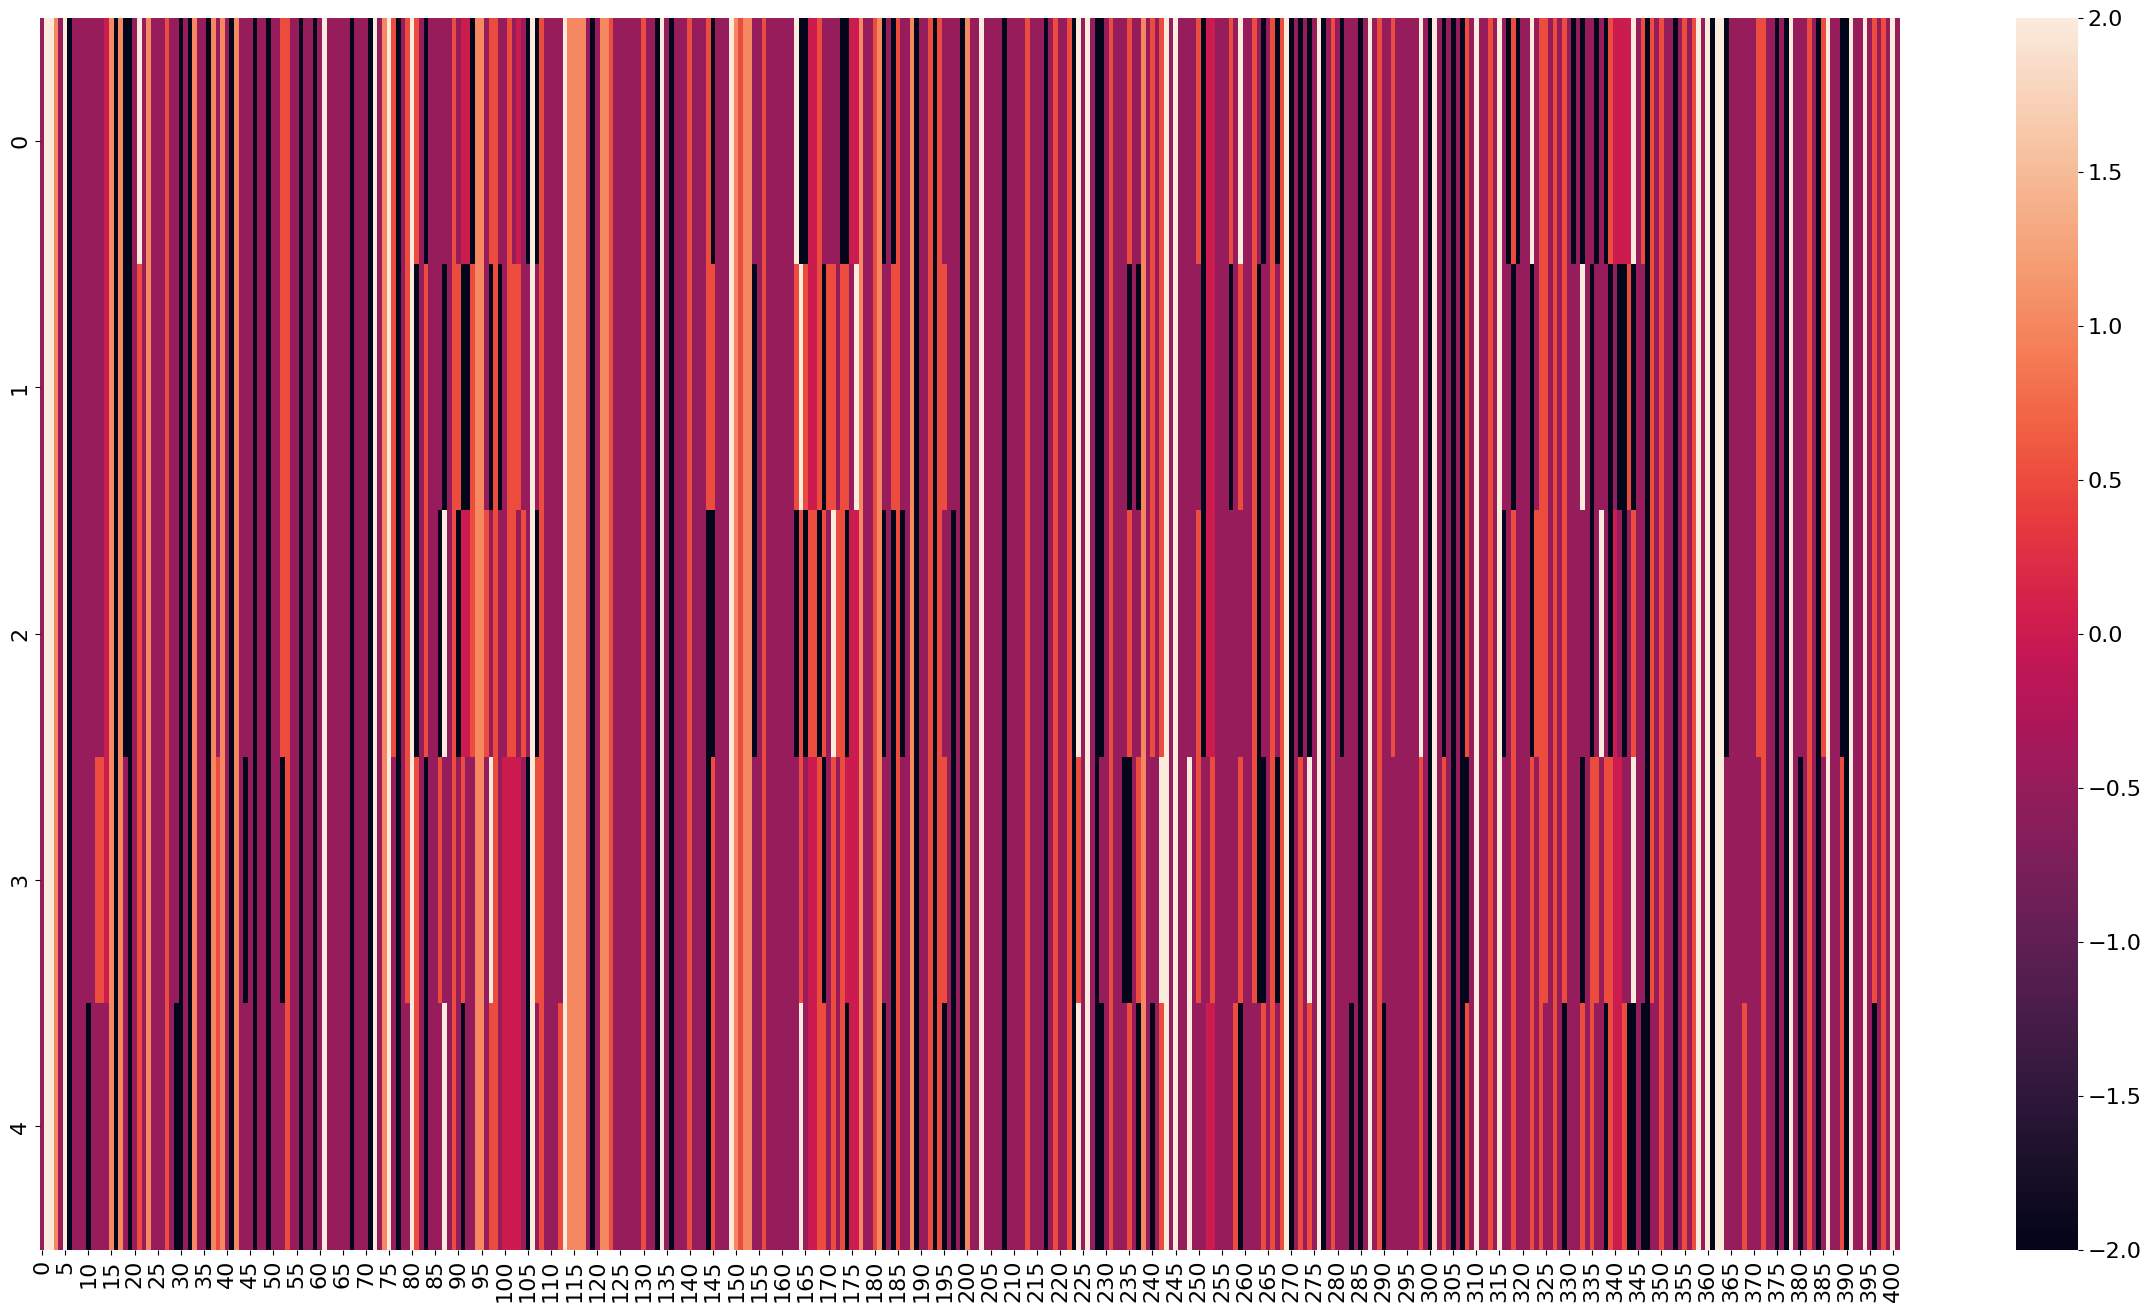

In [ ]:
cc = conservedRange2.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidicSma).replace(['E'], AcidicLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge).replace(['N', 'Q'], HPolLarge).replace(['-'], Nan)
#print(cc)
df = pd.DataFrame(cc)
#df['Ids'] = RTids
print(df)
pp.figure(figsize=(30,16))
sns.heatmap(df)
#df.to_csv('RT_BigCON_sizes.csv')

Here, a Model describes exactly one 3D conformation (see web https://www.tutorialspoint.com/biopython/biopython_pdb_module.htm site for source material) It contains one or more chains.